<span style="font-size:30px">**Medidas de centralidad de los nodos. Parte 2: Centralidad de Cercanía.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### Continuando con la segunda parte de la serie sobre medidas de centralidad, nos corresponde abordar la centralidad de cercanía.

# Fundamentos de la centralidad de cercanía:

### La idea de la centralidad de cercanía es establecer un criterio de la importancia de un nodo con base a su cercanía con los otros nodos de la red. Mientras más cercano sea un nodo (en términos de enlaces) a los demás, más importante es.

### Para lo anterior se toman cuatro conceptos que forman las bases de la centralidad de cercanía: el camino (conjunto de enlaces con un nodo en común), la longitud del camino (número de elementos que tiene ese conjunto de enlaces), el camino geodésico (camino con longitud más corta entre nodos, puede haber más de uno) y la distancia entre nodos (longitud de ese camino más corto que los une).

### Sea $i$ un nodo arbitrario. Medimos su importancia en función a su distancia euclidiana con el resto de nodos $\{j \}$, $ d(i,j)$ para $i \neq j$. Definimos $d(i,i)=0$.

### Consideremos una red con $N$ nodos. Definimos el promedio de las distancias de un nodo $i$ al resto de nodos mediante: 

<font size="5"> $l_i = \frac{1}{N-1} \sum_j d(i,j)$ </font>

### Notemos que $l_i \propto  \sum_j d(i,j)$, por ello definimos la medida de centralidad de cercanía de un nodo arbitrario $i$ como:

<font size="5"> $C_{clo} (i)= \frac{1}{l_i }= \frac{N-1}{\sum_j d(i,j)} $ </font>

### La ecuación anterior puede presentar algunas complicaciones, por ejemplo, puede ocurrir que no haya camino entre un par de nodos $(i,j)$, por lo que $d(i,j) \rightarrow \infty$ y $C_{clo} (i) \rightarrow 0 $. Bajo esta y otras complicaciones que puede haber se desarrolla una relación alternativa como sigue:

<font size="5"> $ C_{clo} ^* (i)= \frac{1}{N-1 } \sum_j \frac{1}{d(i,j)}$ </font>

### En NetworkX la centralidad que se usa comunmente es $C_{clo} (i)$.

# Ejercicio:

### Siguiendo la misma estructura que en el notebook 1, implementar una centralidad de cercanía a la red *ca-netscience.mtx* usando NetworkX.


,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


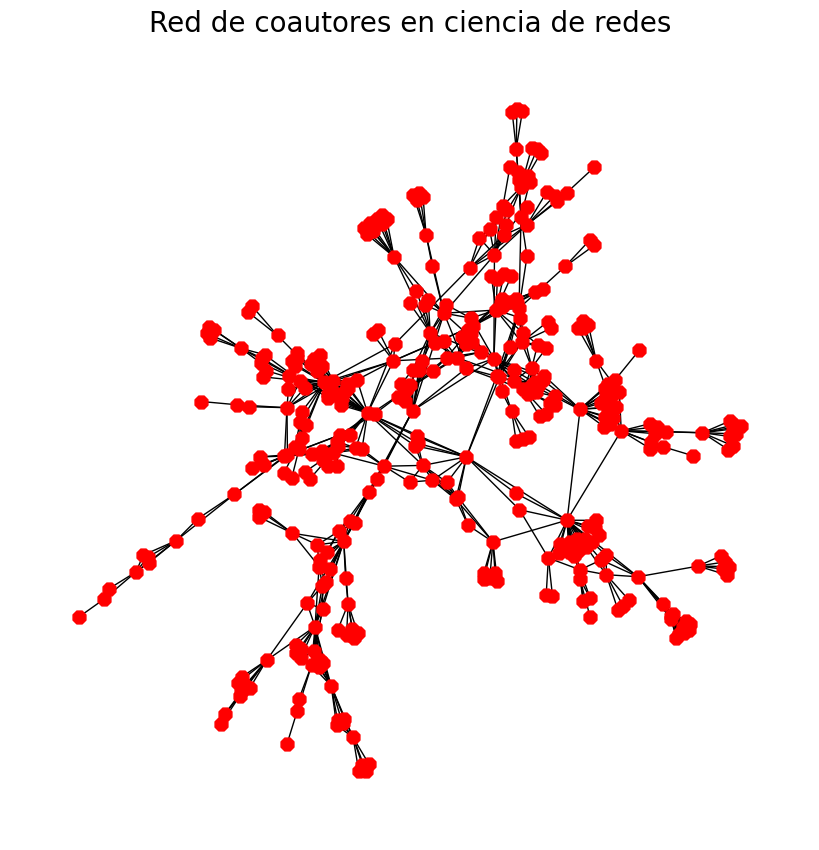

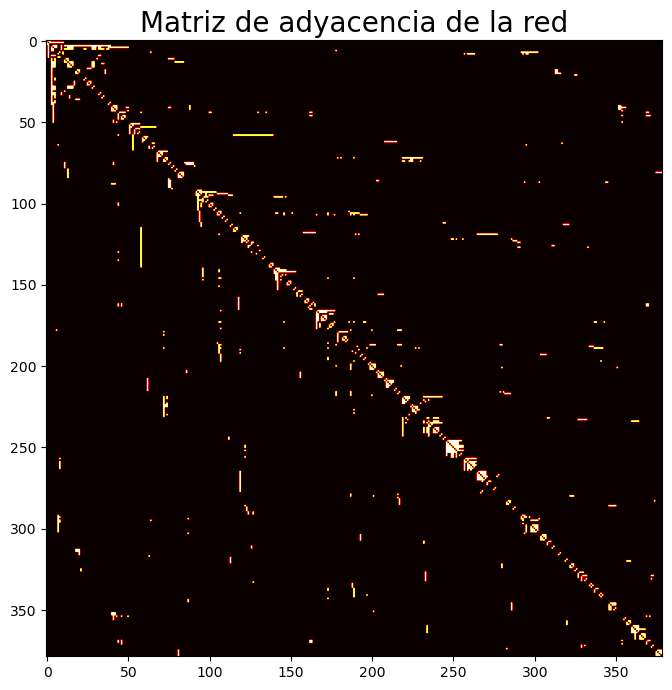

El orden de la matriz es de 379 x 379

La centralidad de grado asociada a los nodos de la red es:


{2: 0.0,
 1: 0.09146071419938531,
 3: 0.0,
 4: 0.1520563824733063,
 5: 0.25062807899754763,
 16: 0.015877891026305803,
 44: 0.17487795951990634,
 113: 0.06458243852541591,
 131: 0.045448457607945615,
 250: 0.00018525535766915075,
 259: 0.0,
 13: 0.04211420084572179,
 14: 0.0,
 15: 0.055437328590038026,
 45: 0.0014654636481085841,
 46: 0.0,
 47: 0.0,
 61: 0.0,
 126: 0.0034852333702908443,
 127: 0.0034852333702908443,
 128: 0.0140391749587152,
 146: 0.010553941588424346,
 152: 0.0,
 153: 0.0,
 154: 0.0,
 164: 0.0,
 165: 0.0,
 166: 0.0,
 176: 0.0,
 177: 0.0,
 249: 0.0,
 274: 0.0,
 313: 0.0,
 314: 0.0,
 323: 0.0,
 324: 0.0,
 330: 0.0,
 371: 0.0,
 373: 4.6781655977058275e-06,
 374: 0.0,
 199: 0.0046667512327683985,
 201: 0.0700036556166419,
 202: 0.0046667512327683985,
 204: 0.00039351726543844777,
 231: 0.23165391320171955,
 235: 0.0,
 236: 0.012658690817560601,
 237: 0.0,
 238: 0.0,
 254: 0.0,
 298: 0.0003537528578579482,
 7: 0.02100964169929687,
 6: 0.0,
 8: 0.14842752030043013,
 190: 1.


El nodo más importante con base al criterio de centralidad de grado es: 
 El nodo 26

Cuya centralidad tiene valor: 
 0.39718418135681216


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'r',node_shape = '8') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Matriz de adyacencia (únicamente para ver la estructura de la red):
plt.figure( figsize = [8,8] )
A=nx.to_numpy_array(G)
plt.imshow(A,"hot") #Para ver las intensidades de la imagen que representan a los enlaces podemos usar el formato de mapa de calor
plt.title("Matriz de adyacencia de la red",fontsize=20)
plt.show()
N1,N2=A.shape
print(f"El orden de la matriz es de {N1} x {N2}")
print()

#Centralidad de cercanía:
cercanía=nx.betweenness_centrality(G)
print("La centralidad de grado asociada a los nodos de la red es:")
display(cercanía)
print()

#Centralidad máxima:
centralidad_máxima=max(cercanía.values())
nodo_máx=max(cercanía, key=cercanía.get)
print(f"El nodo más importante con base al criterio de centralidad de grado es: \n El nodo {nodo_máx}")
print()
print(f"Cuya centralidad tiene valor: \n {centralidad_máxima}")

# Fin del ejercicio.